**Task-4**

**Exploratory Data Analysis for IPL**

**Author-Gowsikkan**

 **Grip**@**TheSparksFoundation**

**Importing Libraries**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import files  
uploaded = files.upload() 

Saving deliveries.csv to deliveries (1).csv
Saving matches.csv to matches (1).csv


In [53]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [54]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [55]:
matches.shape

(756, 18)

In [57]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [59]:
matches.drop(['date', 'umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)
# set id as the index column
matches.set_index('id', inplace=True)

In [60]:
deliveries.shape

(179078, 21)

In [61]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [63]:
# set match_id as the index column
deliveries.set_index('match_id', inplace=True)

In [64]:
#Replacing the Full names by short names
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [65]:
#Replacing the Full names by short names
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [67]:
# merge seasons column in deliveries dataset which will be helpful in further analysis for each season
deliveries_seasons = deliveries.merge(matches["season"], left_on=deliveries.index, right_on=matches.index)

In [68]:
seasons = matches['season'].value_counts().to_frame()
seasons

,season
2013,76
2012,74
2011,73
2019,60
2018,60
2016,60
2014,60
2010,60
2017,59
2015,59


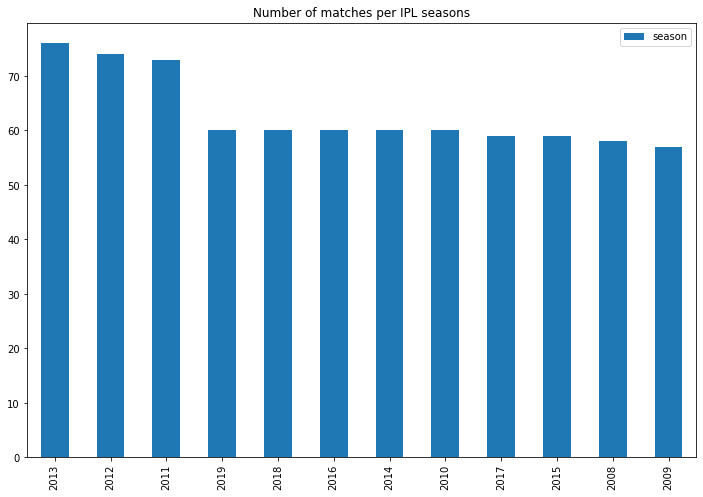

In [69]:
seasons.plot(kind="bar", title="Number of matches per IPL seasons", figsize=(12,8))

In [71]:
no_of_matches = matches['venue'].value_counts().to_frame()
no_of_matches.rename(columns={'venue': 'no_of_matches'}, inplace=True)
no_of_matches

,no_of_matches
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Subrata Roy Sahara Stadium,17


In [73]:
overall_team_stats = pd.DataFrame(
{'Total Matches Played': matches['team1'].value_counts() + matches['team2'].value_counts(), 
'Toss Won': matches['toss_winner'].value_counts(), 'Total Won': matches['winner'].value_counts(), 
 'Total Lost': ((matches['team1'].value_counts() + matches['team2'].value_counts())-matches['winner'].value_counts())})
overall_team_stats.sort_values(by='Total Won', ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost
MI,187,98,109,78
CSK,164,89,100,64
KKR,178,92,92,86
RCB,180,81,84,96
KXIP,176,81,82,94
RR,147,80,75,72
DD,161,80,67,94
SRH,108,46,58,50
DC,75,43,29,46
RPS,30,13,15,15


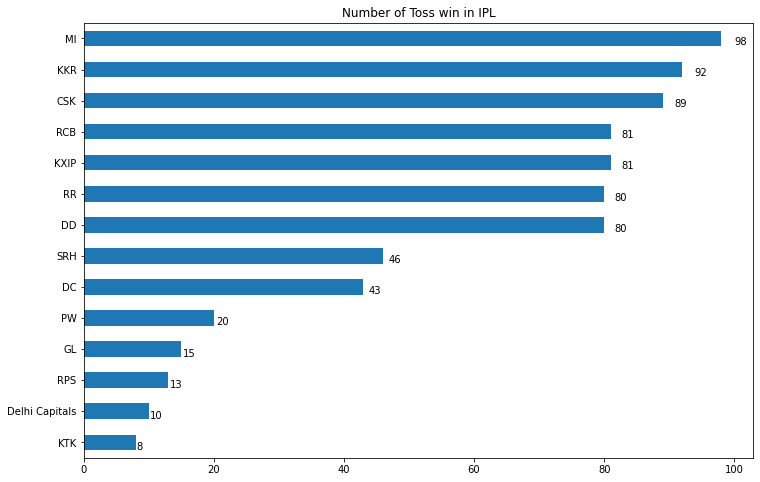

In [74]:
ax = overall_team_stats["Toss Won"].sort_values().plot(kind="barh", title="Number of Toss win in IPL", figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.020, p.get_y() * 1.005))

In [77]:
season_winner = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
season_winner.sort_values(by='season').reset_index(drop=True)

,season,winner
0,2008,RR
1,2009,DC
2,2010,CSK
3,2011,CSK
4,2012,KKR
5,2013,MI
6,2014,KKR
7,2015,MI
8,2016,SRH
9,2017,MI


In [79]:
overall_team_stats['Win Ratio'] = overall_team_stats['Total Won'] * 100 / overall_team_stats['Total Matches Played']
overall_team_stats['Loss Ratio'] = overall_team_stats['Total Lost'] * 100 / overall_team_stats['Total Matches Played']
overall_team_stats.round(2).sort_values(by='Win Ratio', ascending = False)

,Total Matches Played,Toss Won,Total Won,Total Lost,Win Ratio,Loss Ratio
Delhi Capitals,16,10,10,6,62.50,37.50
CSK,164,89,100,64,60.98,39.02
MI,187,98,109,78,58.29,41.71
SRH,108,46,58,50,53.70,46.30
KKR,178,92,92,86,51.69,48.31
RR,147,80,75,72,51.02,48.98
RPS,30,13,15,15,50.00,50.00
RCB,180,81,84,96,46.67,53.33
KXIP,176,81,82,94,46.59,53.41
GL,30,15,13,17,43.33,56.67


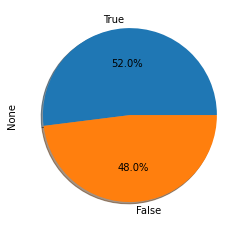

In [83]:
wins = matches['toss_winner'] == matches['winner']
ax = wins.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)

In [86]:
# toss and match wins by toss_winner
toss_winner_as_winner = matches[matches['winner'] == matches['toss_winner']].groupby(['toss_winner'])['winner'].count()
# total toss wins by toss_winner
total_toss_winner = matches.groupby(['toss_winner'])['winner'].count()
win_per_on_toss_win = toss_winner_as_winner / total_toss_winner * 100
win_per_on_toss_win = win_per_on_toss_win.to_frame()
win_per_on_toss_win['lost_per_on_toss_win'] = 100 - win_per_on_toss_win['winner']
win_per_on_toss_win.rename(columns={'winner': 'win_per_on_toss_win'}, inplace=True)
win_per_on_toss_win.round(2).sort_values(by='win_per_on_toss_win', ascending=False)

,win_per_on_toss_win,lost_per_on_toss_win
toss_winner,,
Delhi Capitals,70.00,30.00
GL,66.67,33.33
CSK,64.04,35.96
RPS,61.54,38.46
KKR,57.61,42.39
MI,57.14,42.86
RR,53.85,46.15
RCB,51.25,48.75
KTK,50.00,50.00


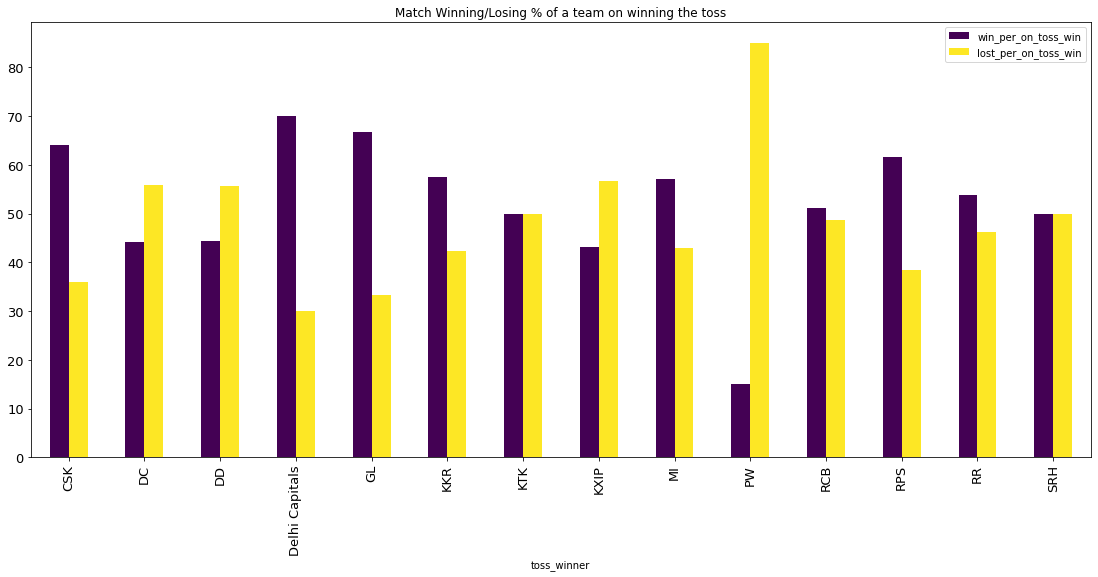

In [88]:
win_per_on_toss_win.plot.bar(figsize=(19,8), title='Match Winning/Losing % of a team on winning the toss',fontsize=13,
 cmap='viridis')

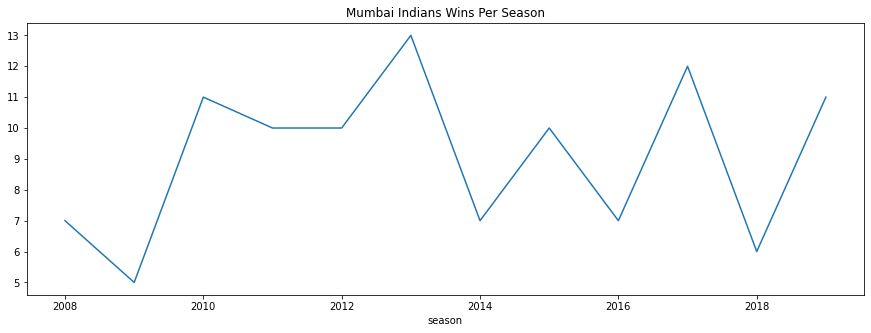

In [92]:
no_of_wins = matches[matches['winner'] == 'MI'].groupby(['season']).count()
no_of_wins['winner'].plot(kind='line', figsize=(15, 5), title='Mumbai Indians Wins Per Season')

Text(0.5, 0, 'Players')

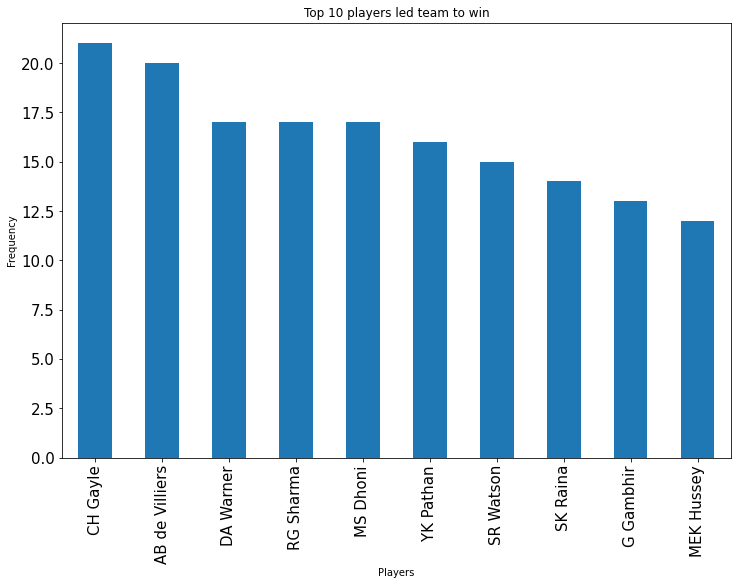

In [100]:
c= matches['player_of_match'].value_counts()
c.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15)
plt.title("Top 10 players led team to win")
plt.ylabel("Frequency")
plt.xlabel("Players")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Venue')

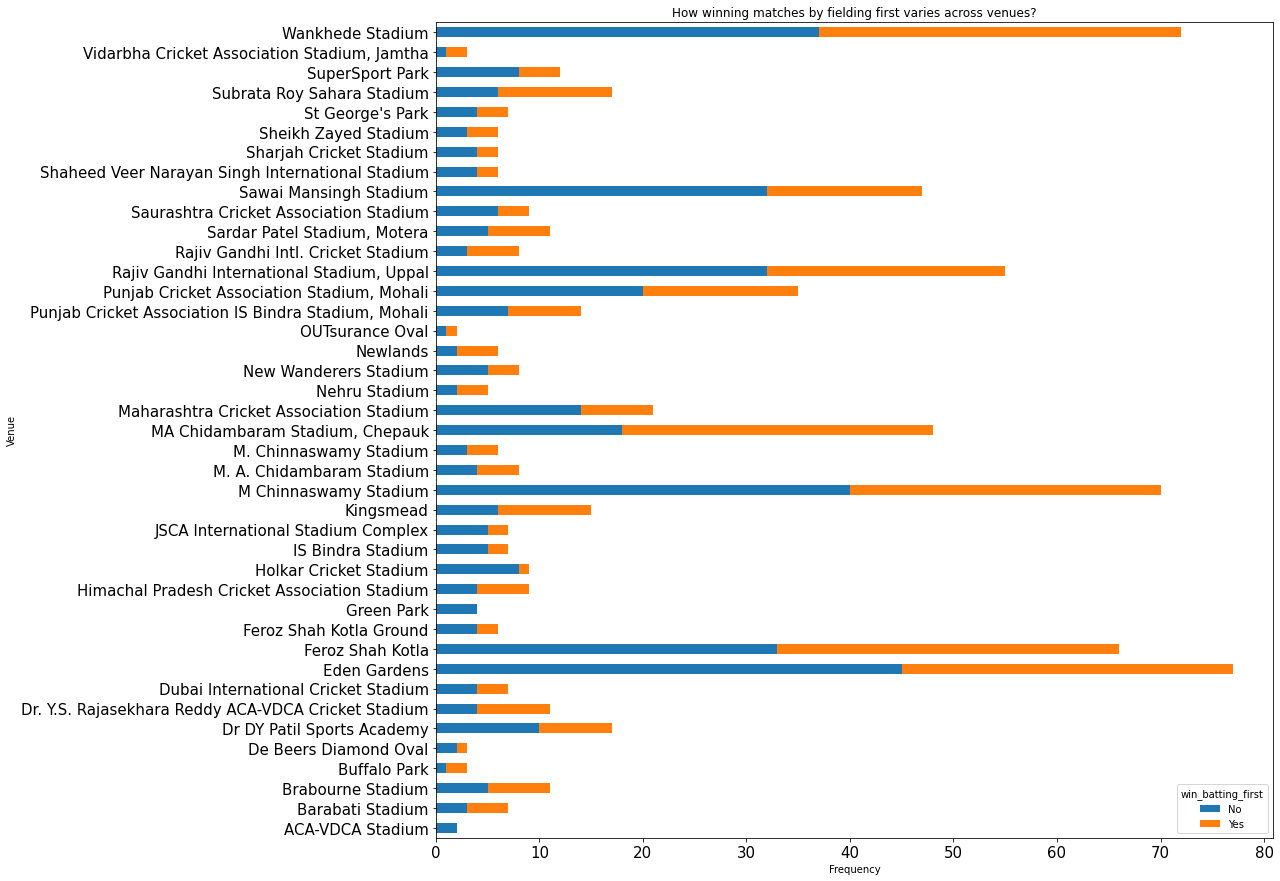

In [102]:
new_matches = matches[matches['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency")
plt.ylabel("Venue")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

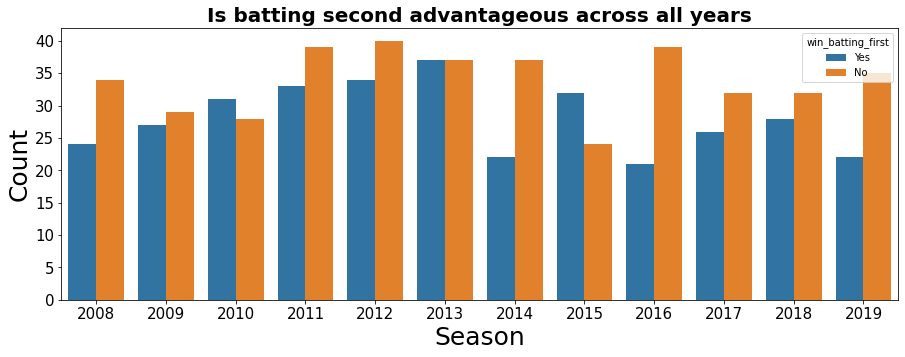

In [103]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all years", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)

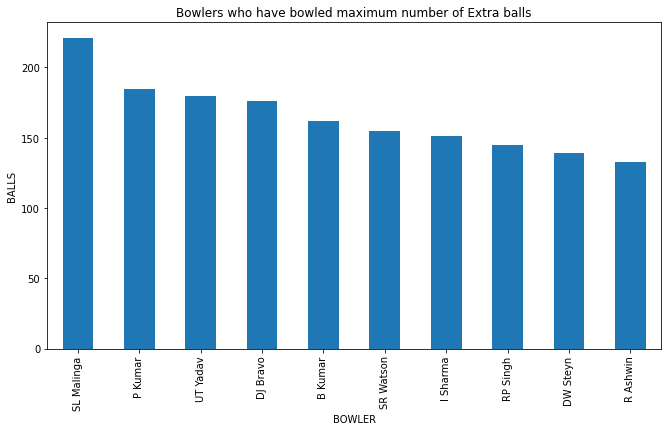

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [107]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T